<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/Only_My_Own_Model_Trained_on_Covid_Normal_Pneumonia_without_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.utils import to_categorical

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve, auc

In [ ]:
import sklearn
sklearn.__version__

'0.24.1'

## Clone Dataset

In [ ]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

Cloning into 'Covid-19-CXR-Dataset'...
remote: Enumerating objects: 4366, done.
remote: Total 4366 (delta 0), reused 0 (delta 0), pack-reused 4366
Receiving objects: 100% (4366/4366), 2.82 GiB | 25.49 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (4350/4350), done.


In [ ]:
size = 150 

# Reading the Training images


In [ ]:
#Reading Training Images For Covid and Normal


import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/Covid-19-CXR-Dataset/train/Covid/*.*")
cv_img = [] 
for img in path_l:
    
    n = cv2.imread(img) 
   # n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
arrayl = np.asarray(cv_img) 
print(arrayl.shape) 

path_2 = glob.glob("/content/Covid-19-CXR-Dataset/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size))
    cv_img.append(n) 
array2 = np.asarray(cv_img) 
print(array2.shape) 

path_3 = glob.glob("/content/Covid-19-CXR-Dataset/train/Viral Pneumonia/*.*")
cv_img = []
for img in path_3:
    n = cv2.imread(img)
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size))
    cv_img.append(n) 
array3 = np.asarray(cv_img) 
print(array3.shape) 

(1330, 150, 150, 3)
(1072, 150, 150, 3)
(1076, 150, 150, 3)


# Reading the Testing images


In [ ]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/Covid-19-CXR-Dataset/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size))
    cv_img.append(n)
array4 = np.asarray(cv_img) 
print(array4.shape) 

path_2 = glob.glob("/content/Covid-19-CXR-Dataset/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img) 
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
array5 = np.asarray(cv_img)
print(array5.shape) 

path_3 = glob.glob("/content/Covid-19-CXR-Dataset/test/Viral Pneumonia/*.*") 
cv_img = []
for img in path_3:
    n = cv2.imread(img) 
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
array6 = np.asarray(cv_img)
print(array6.shape) 


(333, 150, 150, 3)
(269, 150, 150, 3)
(269, 150, 150, 3)


# Dataset Details

|           |Covid |Normal |Pneumonia|Total     |
|:---------:|:---: |:-----:|:-------:|:--------:|
|**Train**  |1330  |1072   |1076     |3478      |
|**Test**   | 333  | 269   |269      |871       |
|**Total**  |1663  |1341   |1345     |**4349**  |


# Concatenating Covid and Normal arrays into one variable for train and test:

In [ ]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2,array3))

Xtest = np.concatenate((array4,array5, array6))

Xtrain.shape , Xtest.shape 

((3478, 150, 150, 3), (871, 150, 150, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [ ]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
labels2 = np.ones(len(array3)) 
for i in range(len(array3)):
  labels2[i] = 2


print('Normal labels : ',labels0 ,'Covid labels : ', labels1, 'Pneumonia : ', labels2) 
len(labels0) , len(labels1) , len(labels2)


Normal labels :  [0. 0. 0. ... 0. 0. 0.] Covid labels :  [1. 1. 1. ... 1. 1. 1.] Pneumonia :  [2. 2. 2. ... 2. 2. 2.]


(1330, 1072, 1076)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [ ]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array4)) 
labels1s = np.ones(len(array5)) 
labels2s = np.ones(len(array6))
for i in range(len(array6)):
  labels2s[i] = 2

print('Normal labels : ',labels0s ,'Covid labels : ', labels1s, 'Pneumonia : ', labels2s) 
len(labels0s) , len(labels1s), len(labels2s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(333, 269, 269)

# Concatenating the labels for Covid and Normal for training and testing:

In [ ]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0, labels1, labels2)) 
ytest = np.concatenate((labels0s, labels1s, labels2s)) 
ytrain.shape, ytest.shape 


((3478,), (871,))

# Splitting the dataset for validation data:

In [ ]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((2782, 150, 150, 3), (696, 150, 150, 3), (2782,), (696,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [ ]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_train_norm = X_train/255 
X_valid_norm = X_valid/255
Xtest_norm = Xtest/255 


In [ ]:
X_train_norm.shape,X_valid_norm.shape,Xtest_norm.shape

((2782, 150, 150, 3), (696, 150, 150, 3), (871, 150, 150, 3))

## Building the Model

In [ ]:
# Model With Dropout Layer
tf.random.set_seed(2)

model1 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model1.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model1.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model1.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model1.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model1.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model1.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model1.add(Flatten())

# add a dense layer : amount of nodes, activation
model1.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model1.add(Dropout(0.5))
model1.add(Dense(3, activation = 'sigmoid'))
model1.summary()

# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model1.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [ ]:
# Model With Dropout Layer
tf.random.set_seed(2)

model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))






# place a dropout layer
model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model2.add(Dropout(0.5))
model2.add(Dense(3, activation = 'sigmoid'))
model2.summary()

# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model2.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)            

## Train the Model

In [ ]:
# train the model
%%time
model1_history = model1.fit(X_train_norm,y_train,epochs = 20,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/20
87/87 [==============================] - 237s 3s/step - loss: 1.1133 - accuracy: 0.5438 - val_loss: 0.4134 - val_accuracy: 0.8649
Epoch 2/20
87/87 [==============================] - 235s 3s/step - loss: 0.3381 - accuracy: 0.8733 - val_loss: 0.2216 - val_accuracy: 0.9282
Epoch 3/20
87/87 [==============================] - 236s 3s/step - loss: 0.2493 - accuracy: 0.9074 - val_loss: 0.1823 - val_accuracy: 0.9483
Epoch 4/20
87/87 [==============================] - 234s 3s/step - loss: 0.1922 - accuracy: 0.9219 - val_loss: 0.1804 - val_accuracy: 0.9397
Epoch 5/20
87/87 [==============================] - 235s 3s/step - loss: 0.1714 - accuracy: 0.9387 - val_loss: 0.1743 - val_accuracy: 0.9425
Epoch 6/20
87/87 [==============================] - 235s 3s/step - loss: 0.1489 - accuracy: 0.9492 - val_loss: 0.1398 - val_accuracy: 0.9468
Epoch 7/20
87/87 [==============================] - 235s 3s/step - loss: 0.1189 - accuracy: 0.9593 - val_loss: 0.1720 - val_accuracy: 0.9511
Epoch 8/20
87

In [ ]:
# train the model
%%time
model2_history = model2.fit(X_train_norm,y_train,epochs = 20,validation_data=(X_valid_norm,y_valid),verbose = 1)

# Evaluating the model

In [ ]:
# Evaluating the model:
model1.evaluate(Xtest_norm,ytest,verbose= 1)

28/28 [==============================] - 18s 647ms/step - loss: 0.3011 - accuracy: 0.9587


[0.3010597229003906, 0.9586681723594666]

In [ ]:
# Evaluating the model:
model2.evaluate(Xtest_norm,ytest,verbose= 1)

# Plot performance metrics

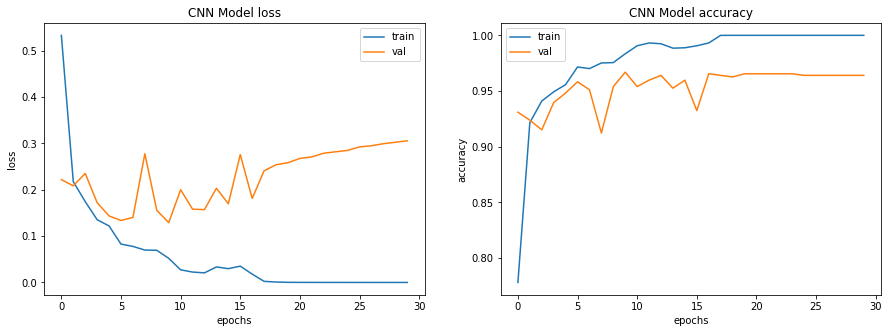

In [ ]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model1_history.history[met])
    ax[i].plot(model1_history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model2_history.history[met])
    ax[i].plot(model2_history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 18s 642ms/step


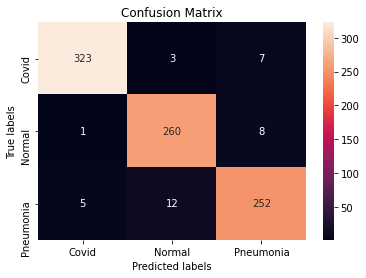

In [ ]:
pred  = model.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);


In [ ]:
Class0_TP =323
Class1_TP =260
Class2_TP =252

Class0_TN = 260+252
Class1_TN = 323+252
Class2_TN = 323+260

Class0_FP =  1+5
Class1_FP = 3+12
Class2_FP = 7+8

Class0_FN = 3+7
Class1_FN = 1+8
Class2_FN = 5+12

# Over all Performance
accuracy = (Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN)/(Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN+Class0_FP+Class1_FP+Class2_FP+Class0_FN+Class1_FN+Class2_FN) 
Specificity = (Class0_TN+Class1_TN+Class2_TN)/(Class0_TN+Class1_TN+Class2_TN+Class0_FP+Class1_FP+Class2_FP)
sensitivity_recall = (Class0_TP+Class1_TP+Class2_TP)/(Class0_TP+Class1_TP+Class2_TP+Class0_FN+Class1_FN+Class2_FN)
precision = (Class0_TP+Class1_TP+Class2_TP)/(Class0_TP+Class1_TP+Class2_TP+Class0_FP+Class1_FP+Class2_FP)
F1_score = 2*(precision*sensitivity_recall)/(precision+sensitivity_recall)

# Class 0 Performance
Class0_accuracy = (Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN)/(Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN+Class0_FP+Class1_FP+Class2_FP+Class0_FN+Class1_FN+Class2_FN) 
# Specificity = TN/(TN+FP)
Class0_Specificity = (Class1_TN+Class2_TN)/(Class1_TN+Class2_TN+Class0_FP)
# Sensivity = TP/(TP+FN)
Class0_sensitivity_recall = (Class0_TP)/(Class0_TP+Class0_FN)
# Precision = TP/(TP+FP)
Class0_precision = (Class0_TP)/(Class0_TP+Class0_FP)
#  F1 Score = 2*(P*R)/(P+R)
Class0_F1_score = 2*(Class0_precision*Class0_sensitivity_recall)/(Class0_precision+Class0_sensitivity_recall)

# Class 1 Performance
Class1_accuracy = (Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN)/(Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN+Class0_FP+Class1_FP+Class2_FP+Class0_FN+Class1_FN+Class2_FN) 
# Specificity = TN/(TN+FP)
Class1_Specificity = (Class0_TN+Class2_TN)/(Class0_TN+Class2_TN+Class1_FP)
# Sensivity = TP/(TP+FN)
Class1_sensitivity_recall = (Class1_TP)/(Class1_TP+Class1_FN)
# Precision = TP/(TP+FP)
Class1_precision = (Class1_TP)/(Class1_TP+Class1_FP)
#  F1 Score = 2*(P*R)/(P+R)
Class1_F1_score = 2*(Class1_precision*Class1_sensitivity_recall)/(Class1_precision+Class1_sensitivity_recall)

# Class 2 Performance
Class2_accuracy = (Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN)/(Class0_TP+Class1_TP+Class2_TP+Class0_TN+Class1_TN+Class2_TN+Class0_FP+Class1_FP+Class2_FP+Class0_FN+Class1_FN+Class2_FN) 
# Specificity = TN/(TN+FP)
Class2_Specificity = (Class1_TN+Class0_TN)/(Class1_TN+Class0_TN+Class2_FP)
# Sensivity = TP/(TP+FN)
Class2_sensitivity_recall = (Class2_TP)/(Class2_TP+Class2_FN)
# Precision = TP/(TP+FP)
Class2_precision = (Class2_TP)/(Class2_TP+Class2_FP)
#  F1 Score = 2*(P*R)/(P+R)
Class2_F1_score = 2*(Class2_precision*Class2_sensitivity_recall)/(Class2_precision+Class2_sensitivity_recall)


from tabulate import tabulate
print(tabulate([['Overall', accuracy*100, Specificity*100,sensitivity_recall*100, precision*100,F1_score*100],
                ['Class 0', Class0_accuracy*100, Class0_Specificity*100,Class0_sensitivity_recall*100, Class0_precision*100,Class0_F1_score*100],
                ['Class 1', Class1_accuracy*100, Class1_Specificity*100,Class1_sensitivity_recall*100, Class1_precision*100,Class1_F1_score*100],
                ['Class 2', Class2_accuracy*100, Class2_Specificity*100,Class2_sensitivity_recall*100, Class2_precision*100,Class2_F1_score*100]], 
               headers=['accuracy', 'Specificity','sensitivity(recall)','precision','F1_score']))


           accuracy    Specificity    sensitivity(recall)    precision    F1_score
-------  ----------  -------------  ---------------------  -----------  ----------
Overall     97.2061        97.8898                95.8668      95.8668     95.8668
Class 0     97.2061        99.4845                96.997       98.1763     97.5831
Class 1     97.2061        98.6486                96.6543      94.5455     95.5882
Class 2     97.2061        98.6388                93.6803      94.382      94.0299


## Saving The Model

In [ ]:
model_save_name = 'C+N+P_With_Dropout_Epoch20.h5'
path = F"/content/gdrive/MyDrive/Temp/{model_save_name}" 
model1.save(path)

In [ ]:
model_save_name = 'C+N+P_With_Dropout_original_Epoch20.h5'
path = F"/content/gdrive/MyDrive/Temp/{model_save_name}" 
model2.save(path)

# Loading the Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/Temp/C+N+P_Without_Dropout_Epoch30.h5')

# ROC

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = model.predict_classes(Xtest_norm, verbose=1)

# ROC
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_prob, pos_label=2)

# AUC
auc_keras = auc(fpr_keras, tpr_keras)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 18s 641ms/step


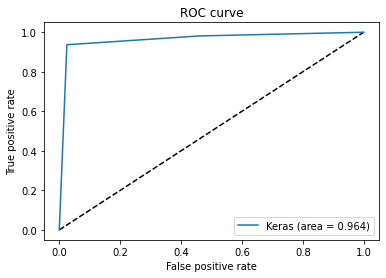

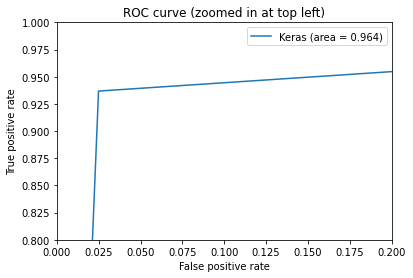

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# precision-recall curve and f1

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model.predict_classes(Xtest_norm)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


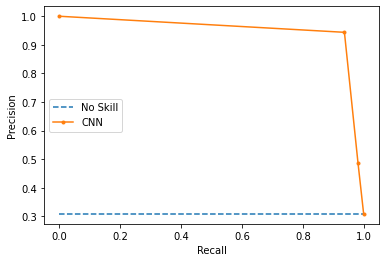

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob, pos_label=2)
# lr_f1, lr_auc = f1_score(ytest, prob), auc(lr_recall, lr_precision)
# summarize scores
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print(' covid19 = 0, normal = 1 , Pnuemonia = 2')

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       333
         1.0       0.95      0.97      0.96       269
         2.0       0.94      0.94      0.94       269

    accuracy                           0.96       871
   macro avg       0.96      0.96      0.96       871
weighted avg       0.96      0.96      0.96       871

 covid19 = 0, normal = 1 , Pnuemonia = 2


## K-Fold cross validation


In [ ]:
# Model With Dropout Layer


def build_model():
  model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  #model.add(Dropout(0.5)) ## Minimizes the overfitting

  # add another convolutional layer
  model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
 # model.add(Dropout(0.5))

  # Flatten the image to 1 dimensional array
  model.add(Flatten())

  # add a dense layer : amount of nodes, activation
  model.add(Dense(256, activation = 'relu'))

  # place a dropout layer
  # 0.5 drop out rate is recommended, half input will be dropped at each update
 # model.add(Dropout(0.5))
  model.add(Dense(3, activation = 'sigmoid'))

  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
  model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
X_train_norm.shape, y_train.shape

((2782, 150, 150, 3), (2782,))

In [ ]:
%%time

from tensorflow.keras.wrappers.scikit_learn. import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

Accuracies per K-Fold  [0.98961037 0.98958331 0.984375   0.99479169 0.97916669]


0.9875054121017456

In [ ]:
results.max()

0.9947916865348816

In [ ]:
results.min()

0.9791666865348816

In [ ]:
results.std()

0.0053136081466382675

In [ ]:
%%time
from sklearn.model_selection import cross_val_predict,
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(estimator, Xtest_norm, ytest, cv=kfold)
conf_mat = confusion_matrix(ytest, y_pred)

Epoch 1/30
16/16 [==============================] - 29s 2s/step - loss: 3.8997 - accuracy: 0.6156
Epoch 2/30
16/16 [==============================] - 28s 2s/step - loss: 0.3188 - accuracy: 0.8865
Epoch 3/30
16/16 [==============================] - 28s 2s/step - loss: 0.2302 - accuracy: 0.9229
Epoch 4/30
16/16 [==============================] - 28s 2s/step - loss: 0.1582 - accuracy: 0.9461
Epoch 5/30
16/16 [==============================] - 28s 2s/step - loss: 0.2082 - accuracy: 0.9086
Epoch 6/30
16/16 [==============================] - 28s 2s/step - loss: 0.1118 - accuracy: 0.9618
Epoch 7/30
16/16 [==============================] - 28s 2s/step - loss: 0.0612 - accuracy: 0.9718
Epoch 8/30
16/16 [==============================] - 28s 2s/step - loss: 0.0856 - accuracy: 0.9604
Epoch 9/30
16/16 [==============================] - 28s 2s/step - loss: 0.0953 - accuracy: 0.9627
Epoch 10/30
16/16 [==============================] - 28s 2s/step - loss: 0.0459 - accuracy: 0.9820
Epoch 11/30
16/16 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 2s 482ms/step
Epoch 1/30
16/16 [==============================] - 29s 2s/step - loss: 4.4968 - accuracy: 0.5614
Epoch 2/30
16/16 [==============================] - 28s 2s/step - loss: 0.3095 - accuracy: 0.8582
Epoch 3/30
16/16 [==============================] - 28s 2s/step - loss: 0.1501 - accuracy: 0.9399
Epoch 4/30
16/16 [==============================] - 28s 2s/step - loss: 0.0992 - accuracy: 0.9690
Epoch 5/30
16/16 [==============================] - 28s 2s/step - loss: 0.0828 - accuracy: 0.9686
Epoch 6/30
16/16 [==============================] - 28s 2s/step - loss: 0.0625 - accuracy: 0.9820
Epoch 7/30
16/16 [==============================] - 28s 2s/step - loss: 0.0435 - accuracy: 0.9913
Epoch 8/30
16/16 [==============================] - 28s 2s/step - loss: 0.0573 - accuracy: 0.9840
Epoch 9/30
16/16 [==============================] - 28s 2s/step - loss: 0.0208 - accuracy: 0.9893
Epoch 10/30
16/16 [==============================] - 28s 2s/step 